# Final Habitat Suitability Model - Notebook 6

* **Products used:** 
[cgls_landcover](https://explorer.digitalearth.africa/products/cgls_landcover)

## Background




Sub-model | Layer weighting |
-----------: | -----------: |
Forests | 20% | 
Other vegetation | 20% |
Human presence | 20% |
Seasonal water | 20% |
Permanent water | 20% |

The notebook executes the following steps:

   1. Load sub-models
   2. Calculate final habitat suitability model
   3. Inspect results

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import datacube
import os
import xarray as xr

## Load sub-models

In [4]:
forest_sm = xr.open_dataset('outputs/forest_sm.nc')
otherveg_sm = xr.open_dataset('outputs/otherveg_sm.nc')
hp_sm = xr.open_dataset('outputs/hp_sm.nc')
sw_sm = xr.open_dataset('outputs/sw_sm.nc')
pw_sm = xr.open_dataset('outputs/pw_sm.nc')

## Define weight

In [6]:
weight = 0.2

In [7]:
hsm = (forest_sm * weight) + (
    otherveg_sm * weight) + (
    hp_sm * weight) + (
    sw_sm * weight) + (
    pw_sm * weight)

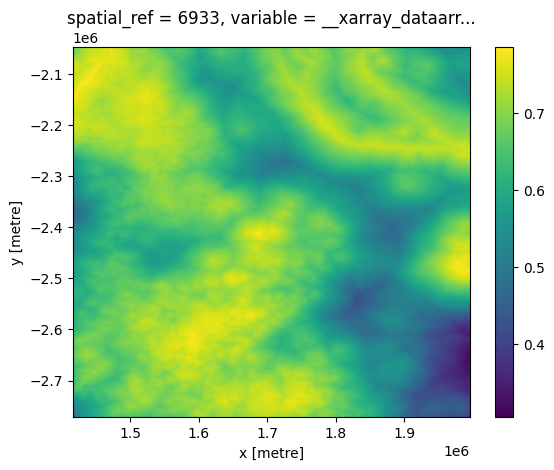

In [12]:
hsm.to_array().plot()

## Save to outputs

In [14]:
hsm.to_array().rio.to_raster('outputs/hsm.tif')

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [23]:
print(datacube.__version__)

1.8.8


**Last Tested:**

In [24]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2023-04-12'